In [1]:
import tensorflow as tf

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.9.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 10s 2us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [34]:
test_images.shape

(10000, 28, 28)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

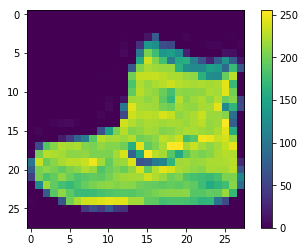

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [37]:
train_images = train_images / 255.0

In [38]:
test_images = test_images / 255.0

C:\Users\RABEB\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


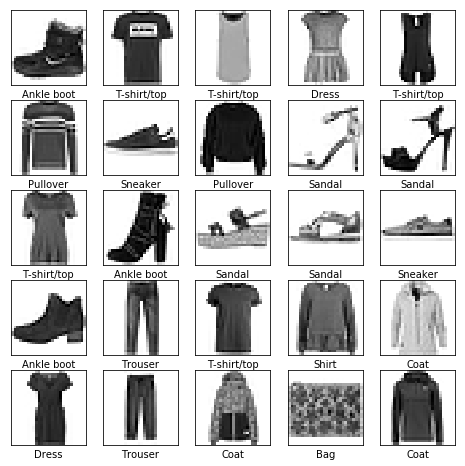

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(30, activation=tf.nn.leaky_relu),
    keras.layers.Dense(10, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [62]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [64]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/step - loss: 0.4265 - acc: 0.8484
Epoch 2/5
60000/60000 [==============================] - 3s 58us/step - loss: 0.4187 - acc: 0.8515
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.4116 - acc: 0.8537
Epoch 4/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.4060 - acc: 0.8563
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.4002 - acc: 0.8583


In [41]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 33us/step
Test accuracy: 0.8284


In [42]:
predictions = model.predict(test_images)

In [43]:
predictions[0]

array([4.1782877e-07, 2.0700098e-08, 4.4160965e-06, 6.2889053e-06,
       5.3923809e-06, 2.3824218e-01, 4.1089907e-06, 3.1362915e-01,
       5.0562285e-03, 4.4305179e-01], dtype=float32)

In [44]:
np.argmax(predictions[0])

9

In [45]:
test_labels[0]

9

C:\Users\RABEB\Miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


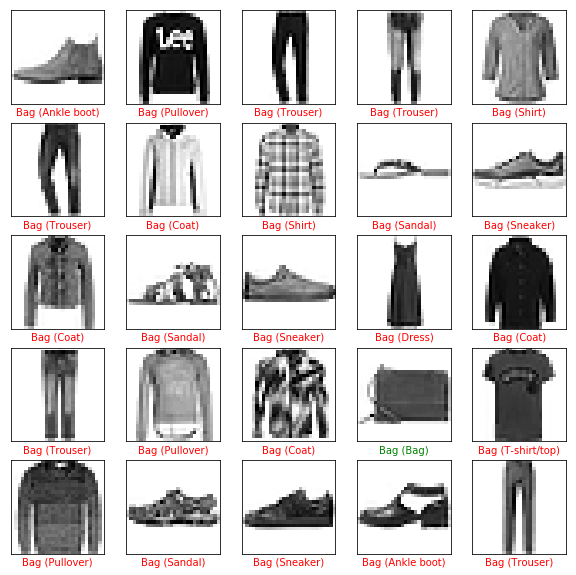

In [25]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)

In [26]:
img = test_images[0]

print(img.shape)

(28, 28)


In [27]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [47]:
predictions = model.predict(img)

print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [46]:
prediction = predictions[0]

np.argmax(prediction)

9